# OpenCV Contours

In general contours are the boundary pixels of an object/image that has same color and intensity. They are useful in shape analysis and object detection/recognition using traditional computer vision algorithms.

Contour is very powerful and common step for **image processing** applications.

Most images contain something in them which means often there's a boundary between say one object to another.

The idea of contours is to create a point-to-point outline around all objects found within an image, the key attribute is that contours are always closed shapes so there's no break or disconnect in the middle of a single contour it defines a complete closed shape on its own.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/vmzfc3wy5wwfrvi/AACY8uK6k6aTF5QJahLkAplta?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['image.cmap'] = 'gray'

### 2. Load an image and display

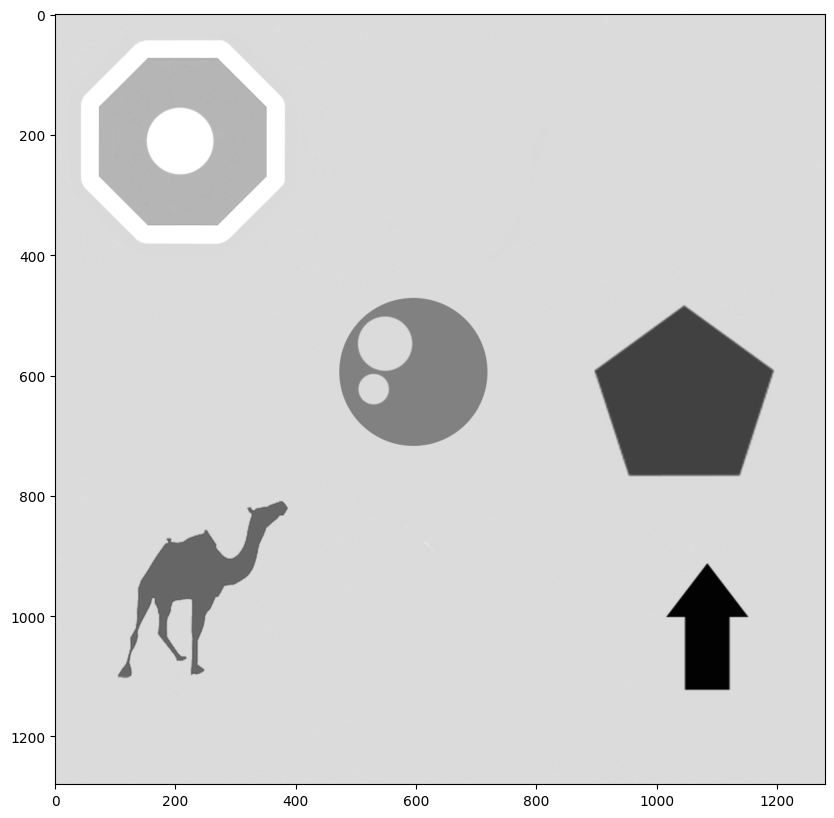

In [3]:
imagePath = "shapes.jpg"
image = cv2.imread(imagePath)

# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display image
plt.imshow(imageGray);

# You certainly can run contours over more complex
# more natural scene images

### 3. Threshold

Remember the idea of contours is to draw a point-to-point outline around the individual shapes which means already have to perform or segmentation of the foreground and background ahead of time.

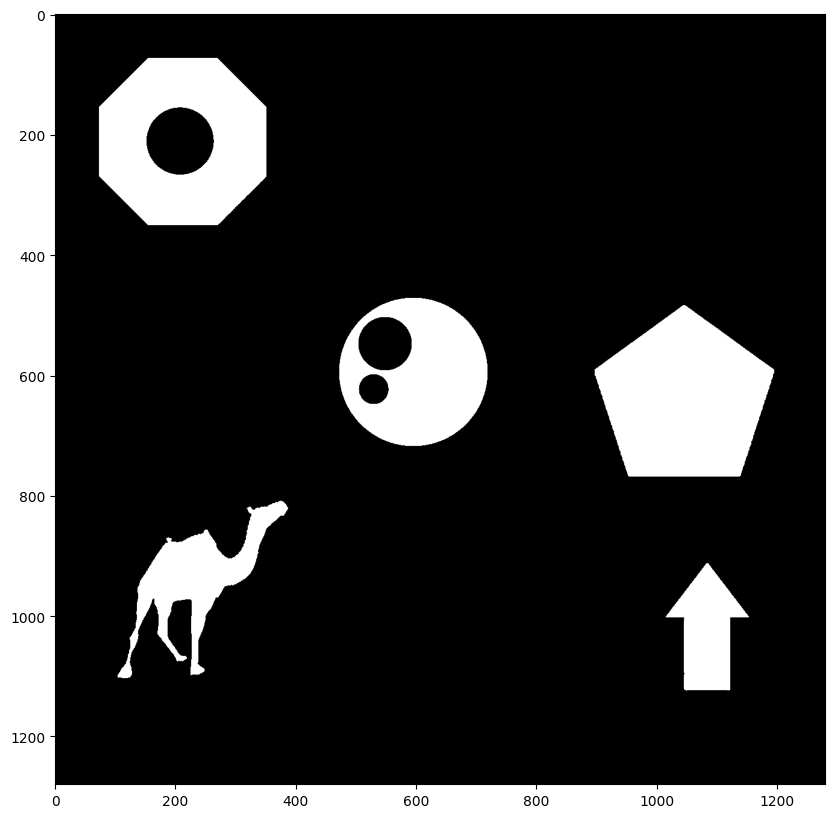

In [4]:
ret, thresh = cv2.threshold(imageGray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh);

In [5]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
# Number of contours.
print(f'Number of contours found: {len(contours)}')

# Hierarchy.
print(f'\nHierarchy: \n{hierarchy}')  # One row represents a single contour

Number of contours found: 8

Hierarchy: 
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]


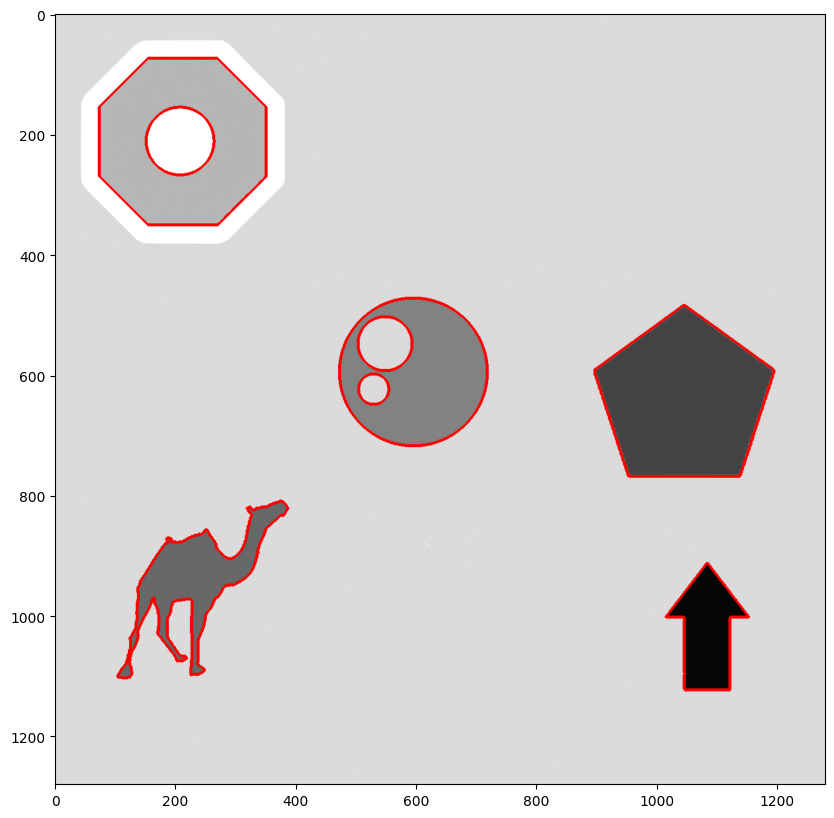

In [7]:
# Create a copy of the original image.
imageCopy1 = image.copy()

# Draw all the contours.
cv2.drawContours(imageCopy1, contours, -1, (0, 0, 255), 3)
plt.imshow(imageCopy1[:, :, ::-1]);

Number of contours found: 5


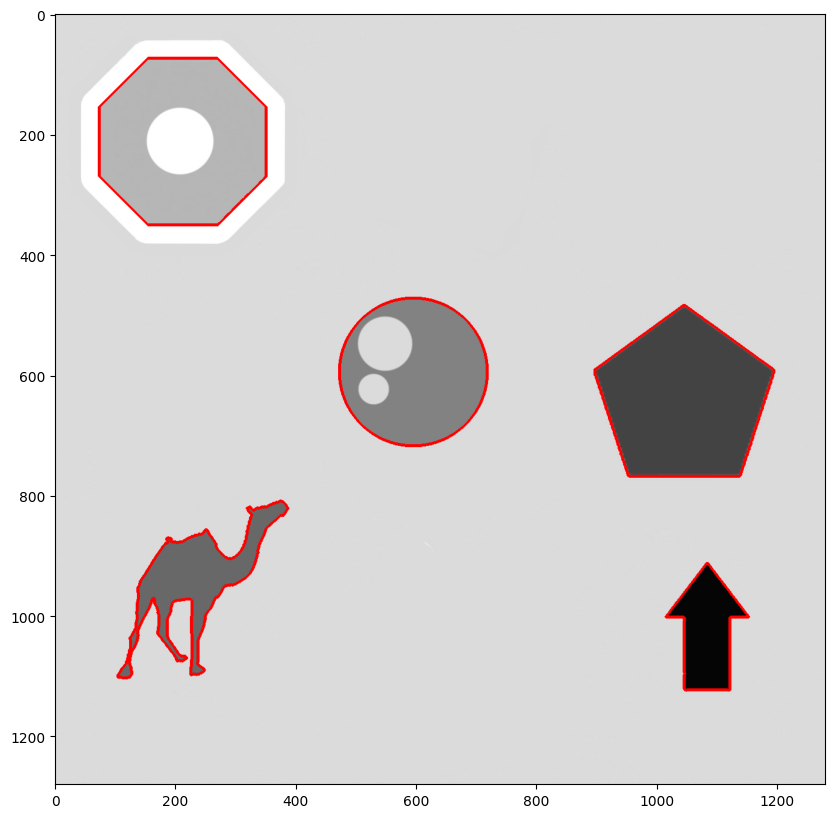

In [8]:
# Find external contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f'Number of contours found: {len(contours)}')

# Create a copy of the original image.
imageCopy2 = image.copy()

# Draw all the contours.
draw_all = -1
cv2.drawContours(imageCopy2, contours, draw_all, (0, 0, 255), 4)

# Display.
plt.imshow(imageCopy2[:, :, ::-1]);

### Inspecting one individual contour

Let's see how to draw only the 4th contour. Note that right now we do not know the numbering of contour in terms of which index represents which shape in the figure

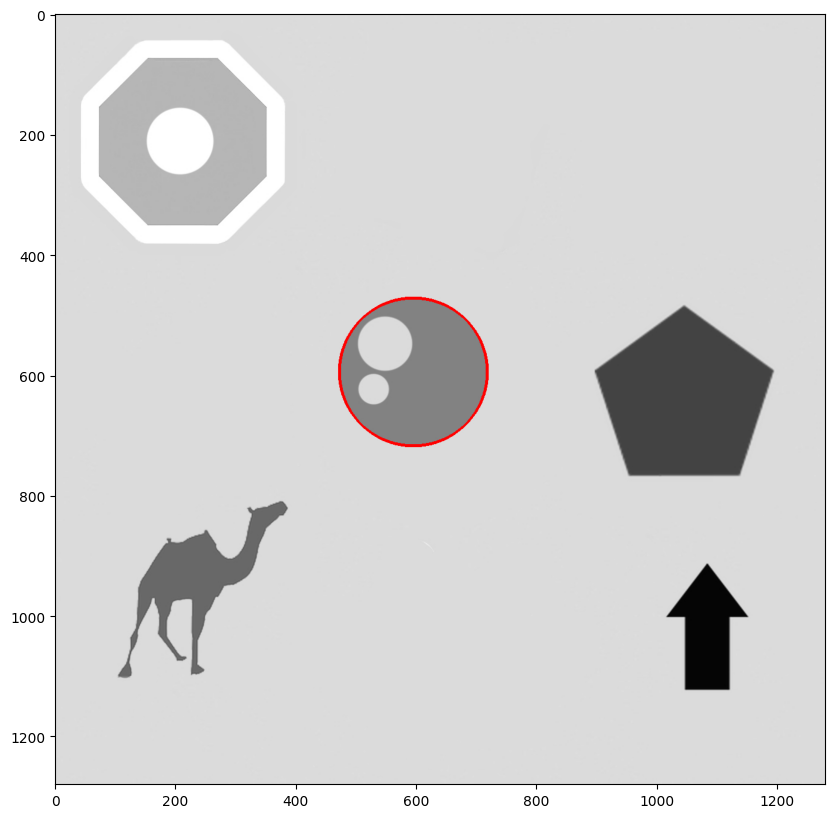

In [9]:
# Create a copy of the original image.
imageCopy3 = image.copy()

# Draw contours.
draw_ind = 3
cv2.drawContours(imageCopy3, contours, draw_ind, (0, 0, 255), 4)

plt.imshow(imageCopy3[:, :, ::-1]);

### Draw each contour in separate colors

In [10]:
def convert_color(hsv):
    """Utility to convert a single hsv color tuple into gbr."""
    pixel_img = np.uint8([[hsv]])
    return tuple(int(i) for i in cv2.cvtColor(pixel_img, cv2.COLOR_HSV2BGR).flatten())

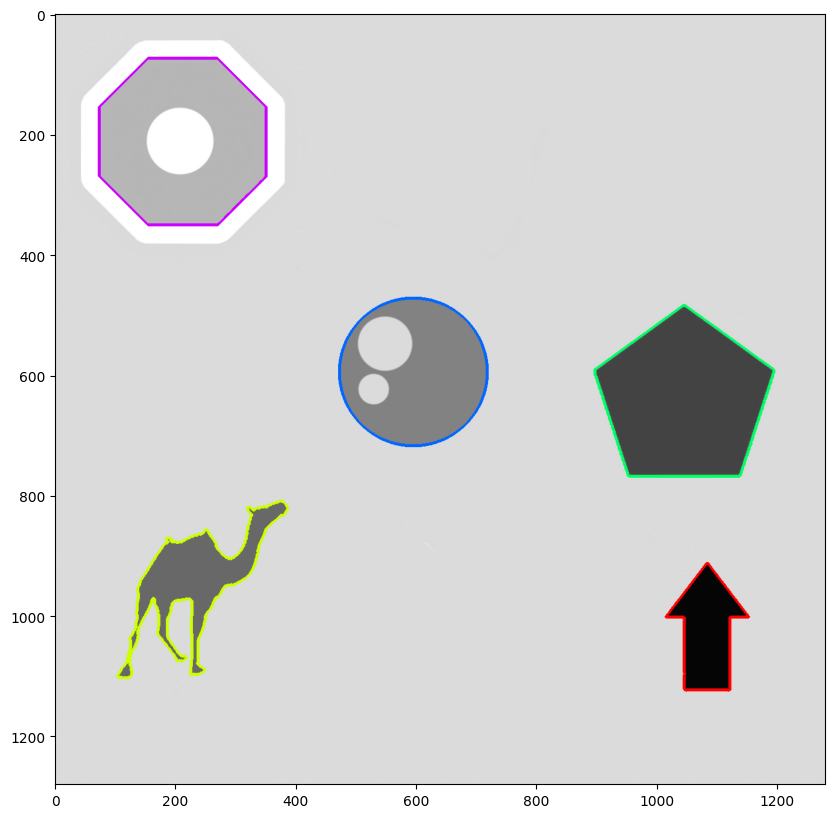

In [11]:
imageCopy4 = image.copy()

for i, single_contour in enumerate(contours):
    hsv = (int(i / len(contours) * 180), 255, 255)
    color = convert_color(hsv)
    cv2.drawContours(imageCopy4, contours, i, color, 3)
    plt.imshow(imageCopy4[:, :, ::-1]);

### Center of Mass or Centroid

Let us find the center of mass for each contour. We can easily do this using OpenCV's *moments* function, and then looking at the first and zero-order spatial moments it provides. There are multiple higher levle of moments you can also extract, but the first order corresponds to the satistical mean.

In [12]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image.
imageCopy5 = image.copy()

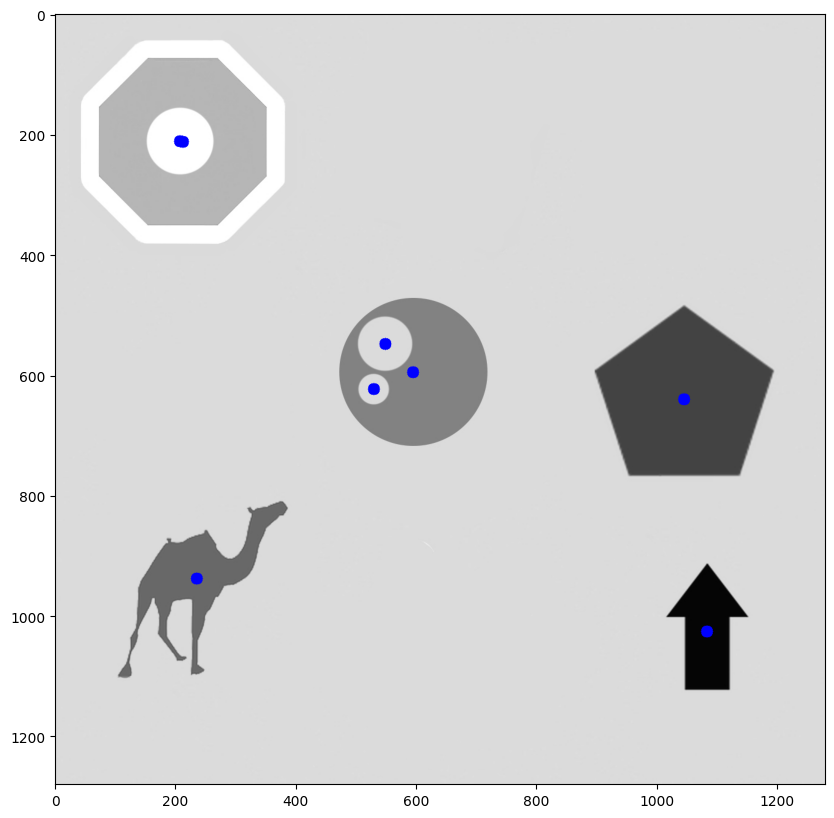

In [13]:
for cnt in contours:
    # We will use the contour moments to find the centroid.
    M = cv2.moments(cnt)
    x = int(round(M['m10'] / M['m00']))
    y = int(round(M['m01'] / M['m00']))
    
    # Mark the center.
    cv2.circle(imageCopy5, (x, y), 10, (255, 0, 0), -1)
# Display
plt.imshow(imageCopy5[:, :, ::-1]);